In [6]:
import sys
sys.path.insert(0, '../')

from simulator.bezier_path import BezierPath
from simulator.point_2d import Point2D
from datetime import datetime, timedelta

start = Point2D(0.0, 0.0)
end = Point2D(1.0, 1.0)
control_point = Point2D(0.9, 0.1)
path = BezierPath(start, end, control_point)

In [11]:
steps = 10
durration = timedelta(seconds=6)
speed = 0.5
start_time = datetime.now()

points = []
angles = []
for i in range(steps):
    current_time = start_time + i * durration / steps
    point, angle = path.calculate_position_and_angle(start_time=start_time, current_time=current_time, speed=speed)
    points.append(point)
    angles.append(angle)
    print(f'{current_time} Point: {point}, Angle: {angle}')


2023-11-13 18:35:33.706370 Point: Point2D(x=0.0, y=0.0), Angle: 0.11065722117389565
2023-11-13 18:35:34.306370 Point: Point2D(x=0.3178387202382592, y=0.06848040611177386), Angle: 0.3290210020551299
2023-11-13 18:35:34.906370 Point: Point2D(x=0.5759804535229773, y=0.19665779917708884), Angle: 0.6054757273600585
2023-11-13 18:35:35.506370 Point: Point2D(x=0.7744251998541541, y=0.3845321791959449), Angle: 0.9118851680290875
2023-11-13 18:35:36.106370 Point: Point2D(x=0.91317295923179, y=0.6321035461683421), Angle: 1.196734751319318
2023-11-13 18:35:36.706370 Point: Point2D(x=0.9922237316558847, y=0.9393719000942805), Angle: 1.4258693752807798
2023-11-13 18:35:37.306370 Point: Point2D(x=1.0, y=1.0), Angle: 1.460139105621001
2023-11-13 18:35:37.906370 Point: Point2D(x=1.0, y=1.0), Angle: 1.460139105621001
2023-11-13 18:35:38.506370 Point: Point2D(x=1.0, y=1.0), Angle: 1.460139105621001
2023-11-13 18:35:39.106370 Point: Point2D(x=1.0, y=1.0), Angle: 1.460139105621001


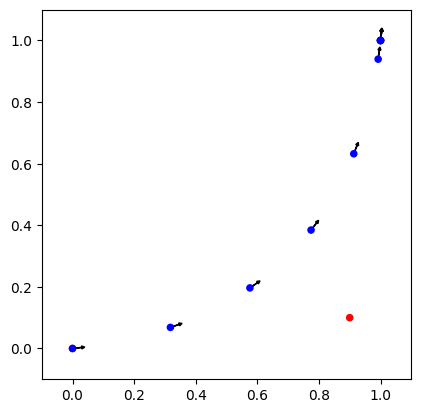

In [12]:
# draw path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# draw path
# x = [point.x for point in points]
# y = [point.y for point in points]
# ax.plot(x, y, 'k--')

# draw control points
patches = []
patches.append(Circle((start.x, start.y), 0.01, color='r'))
patches.append(Circle((end.x, end.y), 0.01, color='r'))
patches.append(Circle((control_point.x, control_point.y), 0.01, color='r'))

# draw path points
for point in points:
    patches.append(Circle((point.x, point.y), 0.01, color='b'))

# draw path angles
for point, angle in zip(points, angles):
    dx = np.cos(angle)*0.03
    dy = np.sin(angle)*0.03
    ax.arrow(point.x, point.y, dx, dy, head_width=0.01, head_length=0.01, fc='k', ec='k')

collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)

plt.show()